In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
df=pd.read_excel(r"C:\Users\drmat\OneDrive\Documents\Career Foundry\COVID_Suicide\02 Data\02 Prepared\Combined\age_group.xlsx",index_col=False, sheet_name='age_group_comb')

In [4]:
df1=df[['covid_cases','suicide_deaths']]

In [5]:
def clean_dataset(df1):
    assert isinstance(df1, pd.DataFrame), "df needs to be a pd.DataFrame"
    df1.dropna(inplace=True)
    indices_to_keep = ~df1.isin([np.nan, np.inf, -np.inf]).any(1)
    return df1[indices_to_keep].astype(np.float64)

In [6]:
clean_dataset(df1)

C:\Users\drmat\AppData\Local\Temp\ipykernel_11532\2934779625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


,covid_cases,suicide_deaths
396,140794.0,25.5
397,56072.0,19.3
398,56072.0,20.6
399,45457.0,18.5
400,45457.0,14.4
...,...,...
1283,38731.0,31.4
1284,13592.0,34.3
1285,9220.0,0.0
1286,9220.0,0.0


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 396 to 1287
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   covid_cases     774 non-null    float64
 1   suicide_deaths  774 non-null    float64
dtypes: float64(2)
memory usage: 18.1 KB


In [8]:
# check the correlation(s) between variables
df1.corr().round(2)

,covid_cases,suicide_deaths
covid_cases,1.00,-0.02
suicide_deaths,-0.02,1.00


In [9]:
# Setting variables
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df1['covid_cases'].values.reshape(-1,1)
y = df1['suicide_deaths'].values.reshape(-1,1)

In [10]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [12]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

### 6. Interpreting Coefficients

In [13]:
# Print y-intercept. The intercept will be your B0 value
print('B0 value: ', regression.intercept_)

# Print the beta coefficients in same order as passed. Each coefficient will be the corresponding Beta for the X’s passed
print('beta coefficients(slope): ', regression.coef_) # how the y variable changes when X changes

# Zip can pair feature names and coeeficients together
zip(df['covid_cases'],regression.coef_)

B0 value:  [17.42195025]
beta coefficients(slope):  [[-7.90044247e-07]]


### 7. Making predictions based on your model

In [14]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

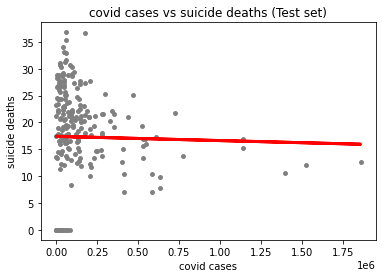

In [15]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('covid cases vs suicide deaths (Test set)')
plot_test.xlabel('covid cases')
plot_test.ylabel('suicide deaths')
plot_test.show()

### 8. Model Evaluation

In [16]:
# Create objects that contain the model summary statistics.

mae = mean_absolute_error(y_test, y_predicted) # This is the mean absolute error 
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [17]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
# take note of which X’s have minimal impacts on y. Removing some of these features may result in an increased accuracy of your model.
print('Mean absolute error :', mae)
print('Mean squared error: ', rmse) # large number indicates that the regression line isn’t an accurate representation of the data
print('R2 score: ', r2) # values closer to 0 indicate a poor fit

Mean absolute error : 7.3802873106212425
Mean squared error:  89.40947746600844
R2 score:  -0.00028420024400444


In [18]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,28.8,17.417803
1,23.5,17.413374
2,21.0,17.077512
3,27.4,17.334496
4,17.7,17.252812
5,19.2,17.382283
6,23.0,17.384300
7,16.8,17.315858
8,0.0,17.417113
9,29.3,17.388272


### 9. Compare how the regression fits the training set

In [19]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [20]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [21]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-7.90044247e-07]]
Mean squared error:  82.69899521871038
R2 score:  0.00038045917773799065


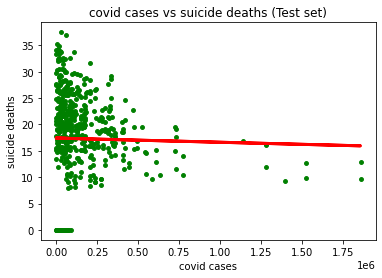

In [23]:
# Visualizing the training set results.

plot_train = plt
plot_train.scatter(X_train, y_train, color='green', s = 15)
plot_train.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_train.title('covid cases vs suicide deaths (Test set)')
plot_train.xlabel('covid cases')
plot_train.ylabel('suicide deaths')
plot_train.show()